In [ ]:
    df = pd.DataFrame({'LWP': np.log(np.float_(y)),'Nd': np.log(np.float_(x))})

    # print(df.AI,df.Nd)
    nx = 30
    ny = 35

    jh, x_mid, y_mid, y_median = get_joint_histgram(nx,ny,np.log(5), np.log(800), np.log(2), np.log(1000),df.Nd,df.LWP)
    print("ha============i", jh[:,0].sum())
    # sigmoid fit (x_mid, ymedian)
    p0 = [max(y_median), np.median(x_mid), np.log(1000), min(y_median)]  # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, x_mid, y_median, p0, method='dogbox')
    x0 = np.linspace(x_mid.min(), x_mid.max(), 800)
    y0 = sigmoid(x0, *popt)


    # definitions for the axes
    left, width = 0.1, 0.85
    bottom, height = 0.3, 0.52
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom - 0.13 - spacing, width-0.17, 0.13]
    # rect_histy = [left + width + spacing, bottom, 0.2, height]

    # set default fontzise for title, x/y label, x/ytick label
    # this part should be put before define fig, ax
    parameters = {'axes.labelsize': 20,
                  'axes.titlesize': 35,
                  'xtick.labelsize':14,
                  'ytick.labelsize':14,
                  }
    plt.rcParams.update(parameters)

    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)

    # no labels
    ax.tick_params(axis="x", labelbottom=False)
    # ax_histx.tick_params(axis="y", labelleft=False)
    ax.tick_params(direction='in', top=True, right=True)
    ax_histx.tick_params(direction='in', top=True, right=True)
    #ax.set_ylabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax.set_ylabel('LWP (gm$\mathregular{^{-2}}$)')

    ax.set_yticks(np.log(np.array([2, 10, 50, 300, 1000])))
    ax.set_yticklabels(['2', '10', '50', '300', '1000'])
    
    ax_histx.set_xlabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax_histx.set_ylabel('PDF (%)')

    # the contour plot:
    # X, Y = np.meshgrid(x_bins[:-1]+(x_bins[1]-x_bins[0])/2, dict_jh['x'])
    print("+++++print contourf x,y,jh", np.shape(x_mid), np.shape(y_mid), np.shape(jh))
    cs = ax.contourf(x_mid, y_mid, jh, cmap='jet') #Greys
    #cs = ax.pcolormesh(x_mid, y_mid, jh, cmap='jet') #Greys

    fig.colorbar(cs, ax=ax, label='PDF (%)')

    # the scatter and fitting line plot
    # ax.plot(x_mid, np.array(x_axis)*b+a, color='blue', ls='-', lw=3, label='Pre-binned $\it{S}$$\mathregular{_{AI}}$'+f" = {b:.2f}$\pm$0.078")
    ax.scatter(x_mid, y_median, color='blue', marker='o', s=100)
    ax.plot(x0,y0,color='yellow', label='sigmoid fit', lw=2)


    
    #PDF plot
    dict_PDF = get_PDF_bin_range(df['Nd'], np.linspace(np.log(5), np.log(800), nx+1))
    ax_histx.plot(dict_PDF['x'], dict_PDF['pdf'], color='black', linewidth=3)
    ax_histx.fill_between(dict_PDF['x'], 0, dict_PDF['pdf'], facecolor='w', alpha=0.7, hatch = 'x')

    #Translate ln to linear
    plt.xticks(np.log(np.array([5, 10, 50, 300,800])),np.array([5, 10, 50, 300,800]).astype(str))

    # ax.set_tight_layout(True)
    figure_name = '{}/relation_LWP-Nd-density-H.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    # plt.show()
    

In [ ]:

    
    
    parser = argparse.ArgumentParser()
    arg = parser.add_argument
    arg('--path-ICON', type=str, default='/home/jvillarreal/Documents/phd/dataset/data_rttov_T12.nc', help='path of the dataset is the ICON simulations')
#     arg('--path-OUTPUT-RTTOV', type=str, default='/home/jvillarreal/Documents/phd/github/output-rttov/VF-output-test-modis-T12.nc', help='path of the dataset the output of RTTOV')
    arg('--path-OUTPUT-RTTOV', type=str, default='/home/jvillarreal/Documents/phd/github/output-rttov/output-test-2-modis.nc', help='path of the dataset the output of RTTOV')

    arg('--path-output', type=str, default='/home/jvillarreal/Documents/phd/output', help='path of the output data is')

    args = parser.parse_args()

    path_ICON = args.path_ICON
    path_OUTPUT_RTTOV = args.path_OUTPUT_RTTOV 
    path_output=args.path_output
    
    #plot_input_ICON(path_output=path_output,variable="lwp",path_ICON=path_ICON)
#     output_RTTOV(path_output=path_output,variable='brdf',path_OUTPUT_RTTOV=path_OUTPUT_RTTOV)
#     output_RTTOV(path_output=path_output,variable='Y',path_OUTPUT_RTTOV=path_OUTPUT_RTTOV)

    # output_RTTOV(path_output=path_output,variable='brdf',path_OUTPUT_RTTOV=path_OUTPUT_RTTOV,input_data="ex_data")
    # output_RTTOV(path_output=path_output,variable='Y',path_OUTPUT_RTTOV=path_OUTPUT_RTTOV,input_data="ex_data")
    
    p_2013, T_2013, q_2013, max_cdnc_2013_cm, lwp_2013, lat, lon, height = lwp_nd_input_ICON(path_output = path_output,  path_ICON = path_ICON)
    # max_cdnc_2013_cm, lwp_2013, lat, lon 
    





#     sys.stdout.close()
  # Plot histogram using pcolormesh

#     plt.imshow(max_cdnc_2013_cm[9:,:])
#     plt.title("max_cdnc_2013_cm")

#     plt.show()

#     plt.imshow(lwp_2013_gm2[9:,:])
#     plt.title("lwp_2013_gm2")

#     plt.show()

    # Creating dataset
    x =  max_cdnc_2013_cm.flatten() #np.random.normal(size = 500000) 
    y =  lwp_2013.flatten() #x * 3 + 4 * np.random.normal(size = 500000) #
    
    


#     fig, ax = plt.subplots(figsize =(10, 7))
#     # Creating plot
#     plt.title("Using matplotlib hexbin function")
#     plt.hexbin(x, y, bins = 2)

#     ax.set_xlabel('Nd (cm−3)') 
#     ax.set_ylabel('LWP (gm−2)') 

#     # show plot
#     plt.tight_layout() 
#     plt.show()

#     # Generate non-symmetric test data

#     # Compute 2d histogram. Note the order of x/y and xedges/yedges

#     H, yedges, xedges = np.histogram2d(y, x, bins=2)
# # Plot histogram using pcolormesh

#     fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
#     ax1.pcolormesh(xedges, yedges, H, cmap='rainbow')
#     ax1.plot(x, 2*np.log(x), 'k-')
#     ax1.set_xlim(x.min(), x.max())
#     ax1.set_ylim(y.min(), y.max())
#     ax1.set_xlabel('x')
#     ax1.set_ylabel('y')
#     ax1.set_title('histogram2d')
#     ax1.grid()
    
#     # Create hexbin plot for comparison

#     ax2.hexbin(x, y, gridsize=2, cmap='rainbow')
#     ax2.plot(x, 2*np.log(x), 'k-')
#     ax2.set_title('hexbin')
#     ax2.set_xlim(x.min(), x.max())
#     ax2.set_xlabel('x')
#     ax2.grid()
#     #plt.show()


#     print('=================lwd',np.max(y), np.min(y))
#     unique, counts = np.unique(y, return_counts=True)
#     pprint.pprint(np.asarray((unique, counts)).T)
    
#     df_y=pd.DataFrame(y) 
#     pd.set_option('display.float_format', lambda x: '%.1f' % x)
#     df_y.describe().to_csv( "LWP.csv")
    
#     print("ok dataframe lwp")
    
#     print('=================n',np.max(x), np.min(x))
#     unique, counts = np.unique(x, return_counts=True)
#     pprint.pprint  (np.asarray((unique, counts)).T)
#     df_x=pd.DataFrame(x) 
#     pd.set_option('display.float_format', lambda x: '%.1f' % x)
#     df_x.describe().to_csv( "Nd.csv")
    
#     df_x.describe()
#     print("ok dataframe Nd")
    
    #n, bins, patches = plt.hist(y,bins=30)
    #print(n, bins, patches)
    #plt.show()
    fig = plt.figure(figsize=(12, 12))
    (ax0, ax1), (ax3, ax4)  = fig.subplots(nrows=2, ncols=2 )
    ax0.hist(y,density=True,label="Sample",bins =10,range=(0, 1000))
    ax0.set_ylabel("Density")
    ax0.set_title('LWP')

    ax1.hist(y,density=True,label="Sample",bins =10,range=(0, 800))
    ax1.set_ylabel("Density")
    ax1.set_title('Nd')


    #n, bins, patches = plt.hist(x,bins=40)
    #print(n, bins, patches)
   # plt.show()
    # plt.plot(x, norm.pdf(x))
    # plt.show()
    
    nx = 30
    ny = 35
    
    h,xedges, yedges, image = ax3.hist2d(np.log(x), np.log(y), bins=[nx,ny], range=[[np.log(5), np.log(800)], [np.log(5), np.log(1000)]])
    xedges_mid, yedges_mid = get_values_joint_hist(xedges, yedges)
        
    ##############################falta lo siguiente######
#     avg_cdcs_mk_T = np.zeros((20,20))
#     avg_lwps_mk_T = np.zeros((20,20))

#     for l in range(20):  
#         x_filter = [i for i in x if i >= np.exp(xedges[l]) and i <= np.exp(xedges[l+1])]
#         filter(between(x, np.exp(xedges_mid[l]), np.exp(xedges_mid[l+1])) )
# #         tmp_T = data_modis_DT %>% filter(between(x, np.exp(xedges[l]), np.exp(xedges[l+1])) ) %>% select(x, y)
# #         avg_cdcs_mk_T[l]  = np.mean(tmp_T$x)
# #         avg_lwps_mk_T[l]  = np.mean(tmp_T$y)    
    ###########

   
    #h2d_2013 = 2d,1d,1d,QuadMesh
    print('++++++++output of the hist2d:', np.shape(h), np.shape(xedges), np.shape(yedges),np.shape(image))
    ax3.set_ylabel("LWP (gm-2)")
    ax3.set_xlabel("Nd (cm-3)")

    ax3.set_title('LWP-ND')

    ax3.set_xticks(np.log(np.array([5, 10, 50, 300, 800])))
    ax3.set_xticklabels(['5', '10', '50', '300', '800'])

    ax3.set_yticks(np.log(np.array([5, 10, 50, 300, 1000])))
    ax3.set_yticklabels(['5', '10', '50', '300', '1000'])
    
    
    cps_2013 = np.zeros(np.shape(h))
    print(np.shape(cps_2013))
                                                                                                                                               
    for x in range(nx):                                                                                                                                                                                                 
        sum_cs_2013= np.sum(h[x,:])                                                                                                                                                                        
        cps_2013 [x,:] =(h[x,:])/sum_cs_2013                                                                                                                                                              
      # scale_fill_gradientn(colours = pal(100), limits=c(0,22), breaks=c(0,5,10,15,20), name="CP(%)") +
    print('pcoclorsj333',np.shape(xedges_mid), np.shape(yedges_mid), np.shape(h))
    # ax4.pcolormesh(xedges_mid, yedges_mid, h.T, cmap ='jet') #cmap=cmap.N, norm=norm)
    # ax4.contourf(xedges_mid, yedges_mid, h.T, cmap ='jet') #cmap=cmap.N, norm=norm)
    # ax4.contourf(xedges_mid, yedges_mid, cps_2013.T, cmap ='jet') #cmap=cmap.N, norm=norm) ##eestree ulyimo
    # ax4.contourf(cps_2013.T, cmap ='jet') #cmap=cmap.N, norm=norm) ##eestree ulyimo
    ###################mk##################################

    cps_mk_new_T = np.zeros((nx,ny))
    lwp_dfs_mk_T = np.zeros((nx*ny)) 
    cdc_dfs_mk_T = np.zeros((nx*ny)) 
    cps_dfs_mk_T = np.zeros((nx*ny)) 


#########
    m=0    
    for j in range(ny):
        for i in range(nx):
            if(not(np.isnan(cps_2013[i,j])) and (cps_2013[i,j]*100 > ny)):
                cps_mk_new_T[i,j] = ny+2
            elif(not(np.isnan(cps_2013[i,j])) and (cps_2013[i,j]*100 < 1)):
                cps_mk_new_T[i,j] = 0
            else:
                cps_mk_new_T[i,j] = cps_2013[i,j]*100
                   
            if((np.isnan(cps_mk_new_T[i,j]))):
                 cps_mk_new_T[i,j] = 0.0
             
            cps_dfs_mk_T[m] = cps_mk_new_T[i,j]
            cdc_dfs_mk_T[m] = xedges_mid[i]
            lwp_dfs_mk_T[m] = yedges_mid[j]

            m=m+1
    print("=========values_edge x,y,cps", np.shape(xedges_mid), np.shape(yedges_mid), np.shape(cps_mk_new_T) )
    # spl = UnivariateSpline(np.exp(xedges), avg_lwps_mk_T)
    # ax4.plot(xedges, spl(xs), 'b', lw=3)
    
    
    # cs = ax.contourf(x_mid, y_mid, jh, cmap='jet') #Greys

#     # c = ax4.pcolormesh(np.exp(yedges_mid),np.exp(xedges_mid),  cps_mk_new_T, cmap ='jet') #cmap=cmap.N, norm=norm)


    
    c = ax4.contourf(xedges_mid,yedges_mid, cps_mk_new_T.T, cmap='jet') #Greys #np.exp(xedges_mid),np.exp(yedges_mid), 

    # ax4.set_xticks(np.log(np.array([5, 10, 50, 300, 800])))
    # ax4.set_xticklabels(['5', '10', '50', '300', '800'])

    # ax4.set_yticks(np.log(np.array([5, 10, 50, 300, 1000])))

    # cbar = fig.colorbar(c, ax=ax4,label= "CP(%)", pad="5%", ticks=[0,5,10,15,22]) 
    fig.colorbar(c, ax=ax4, label='CP (%)', ticks=[0,5,10,15,25])
    

    #location="right",pad="5%",,,shrink=0.75,
    ax4.set_title('LWP- Nd (02 May 2013)')
    ax4.set_xlabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)') #, labelpad=14,fontsize=14)
    ax4.set_ylabel('LWP (gm$\mathregular{^{-2}}$)') #, labelpad=14,fontsize=14)
    

    
    
    # ax3.xticks(np.log(np.array([5, 10, 50, 300,1000])),np.array([5, 10, 50, 300,1000]).astype(str))

    # # Show all ticks and label them with the respective list entries
    # ax.set_xticks(np.arange(len(farmers)), labels=farmers)
    # ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)


    
    #ax3.set_xticks(np.log(np.array([5, 10, 50, 300,1000])), ['5', '10', '50', '300','1000'])
    #ax3.set_yticks([np.log(np.array([2, 10, 50, 300,800]))],['2', '10', '50', '300','800'])

    ################Condition Probability############# 
    # cps_2013 = np.array((20,20))                                                                                                                                                                                         
    #   for(i in 1:20):                                                                                                                                                                                                 
    #     sum_cs_2013=sum(h2d_2013$counts[i,])                                                                                                                                                                            
    #     cps_2013[i,]=(h2d_2013$counts[i,])/sum_cs_2013                                                                                                                                                                  


    plt.tight_layout()
    figure_name = '{}/relation_LWP-Nd.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    plt.close()   
    
    ###############################################################################################
    

###$$$$$$$$$$$$$$$$$$$$$$$$hhhhh$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
      # definitions for the axes
    left, width = 0.1, 0.85
    bottom, height = 0.3, 0.52
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom - 0.13 - spacing, width-0.17, 0.13]
   
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)

        # no labels
    ax.tick_params(axis="x", labelbottom=False)
    # ax_histx.tick_params(axis="y", labelleft=False)
    ax.tick_params(direction='in', top=True, right=True)
    ax_histx.tick_params(direction='in', top=True, right=True)
    #ax.set_ylabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    
    cs = ax.contourf(xedges_mid,yedges_mid, cps_mk_new_T.T, cmap='jet') #Greys #np.exp(xedges_mid),np.exp(yedges_mid), 

    df = pd.DataFrame({'LWP': np.log(np.float_(y)),'Nd': np.log(np.float_(x))})

    # print(df.AI,df.Nd)
    nx = 30
    ny = 35
    
    fig.colorbar(cs, ax=ax, label='PDF (%)')
    ax.set_ylabel('LWP (gm$\mathregular{^{-2}}$)')
    ax.set_yticks(np.log(np.array([2, 10, 50, 300, 1000])))
    ax.set_yticklabels(['2', '10', '50', '300', '1000'])
    
    dict_PDF = get_PDF_bin_range(df['Nd'], np.linspace(np.log(5), np.log(800), nx+1))
    ax_histx.plot(dict_PDF['x'], dict_PDF['pdf'], color='black', linewidth=3)
    ax_histx.fill_between(dict_PDF['x'], 0, dict_PDF['pdf'], facecolor='w', alpha=0.7, hatch = 'x')

    plt.xticks(np.log(np.array([5, 10, 50, 300,800])),np.array([5, 10, 50, 300,800]).astype(str))

    
    ax_histx.set_xlabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax_histx.set_ylabel('PDF (%)')

    
    
    plt.tight_layout()
    figure_name = '{}/relation_LWP-Nd-density-me.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    plt.close()                
###$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$hhhhh$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ 
        



    # jh, x_mid, y_mid, y_median = get_joint_histgram(nx = 20 , ny = 20, xmin = np.log(150), xmax = np.log(1000), ymin = np.log(5), ymax = np.log(1000), x =x, y=y)
   

#     fig = plt.figure(figsize=(8, 8))
#     ax = fig.add_subplot(111)

#     ax.set_xlabel('Nd')
#     ax.set_ylabel('LWP')
#     cs = ax.contourf(x_mid, y_mid, jh, cmap='Greys')
#     fig.colorbar(cs, ax=ax, label='PDF (%)')
#     plt.show()
    ###############################################################################################
    
    df = pd.DataFrame({'LWP': np.log(np.float_(y)),'Nd': np.log(np.float_(x))})
    jh, x_mid, y_mid, y_median = get_joint_histgram(nx,ny,np.log(5), np.log(800), np.log(2), np.log(1000),df.Nd,df.LWP)
    print("ha============i", jh[:,0].sum())
    # sigmoid fit (x_mid, ymedian)
    p0 = [max(y_median), np.median(x_mid), np.log(1000), min(y_median)]  # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, x_mid, y_median, p0, method='dogbox')
    x0 = np.linspace(x_mid.min(), x_mid.max(), 800)
    y0 = sigmoid(x0, *popt)


    # definitions for the axes
    left, width = 0.1, 0.85
    bottom, height = 0.3, 0.52
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom - 0.13 - spacing, width-0.17, 0.13]
    # rect_histy = [left + width + spacing, bottom, 0.2, height]

    # set default fontzise for title, x/y label, x/ytick label
    # this part should be put before define fig, ax
    parameters = {'axes.labelsize': 20,
                  'axes.titlesize': 35,
                  'xtick.labelsize':14,
                  'ytick.labelsize':14,
                  }
    plt.rcParams.update(parameters)

    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)

    # no labels
    ax.tick_params(axis="x", labelbottom=False)
    # ax_histx.tick_params(axis="y", labelleft=False)
    ax.tick_params(direction='in', top=True, right=True)
    ax_histx.tick_params(direction='in', top=True, right=True)
    #ax.set_ylabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax.set_ylabel('LWP (gm$\mathregular{^{-2}}$)')  

    ax.set_yticks(np.log(np.array([2, 10, 50, 300, 1000])))
    ax.set_yticklabels(['2', '10', '50', '300', '1000'])
    
    ax_histx.set_xlabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax_histx.set_ylabel('PDF (%)')

    # the contour plot:
    # X, Y = np.meshgrid(x_bins[:-1]+(x_bins[1]-x_bins[0])/2, dict_jh['x'])
    print("+++++print contourf x,y,jh", np.shape(x_mid), np.shape(y_mid), np.shape(jh))
    cs = ax.contourf(x_mid, y_mid, jh, cmap='jet') #Greys
    #cs = ax.pcolormesh(x_mid, y_mid, jh, cmap='jet') #Greys

    fig.colorbar(cs, ax=ax, label='PDF (%)')

    # the scatter and fitting line plot
    # ax.plot(x_mid, np.array(x_axis)*b+a, color='blue', ls='-', lw=3, label='Pre-binned $\it{S}$$\mathregular{_{AI}}$'+f" = {b:.2f}$\pm$0.078")
    ax.scatter(x_mid, y_median, color='blue', marker='o', s=100)
    ax.plot(x0,y0,color='yellow', label='sigmoid fit', lw=2)


    
    #PDF plot
    dict_PDF = get_PDF_bin_range(df['Nd'], np.linspace(np.log(5), np.log(800), nx+1))
    ax_histx.plot(dict_PDF['x'], dict_PDF['pdf'], color='black', linewidth=3)
    ax_histx.fill_between(dict_PDF['x'], 0, dict_PDF['pdf'], facecolor='w', alpha=0.7, hatch = 'x')

    #Translate ln to linear
    plt.xticks(np.log(np.array([5, 10, 50, 300,800])),np.array([5, 10, 50, 300,800]).astype(str))

    # ax.set_tight_layout(True)
    figure_name = '{}/relation_LWP-Nd-density-H.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    # plt.show()
    

# HERE

### plot

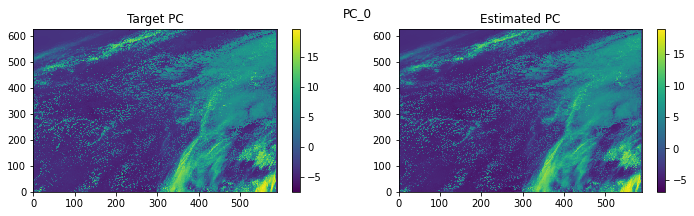

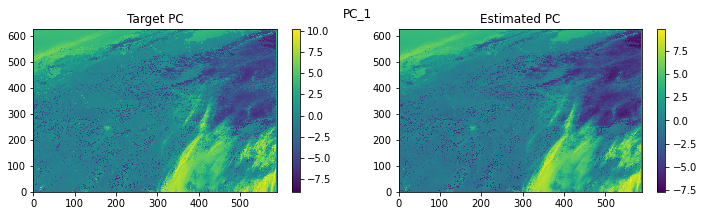

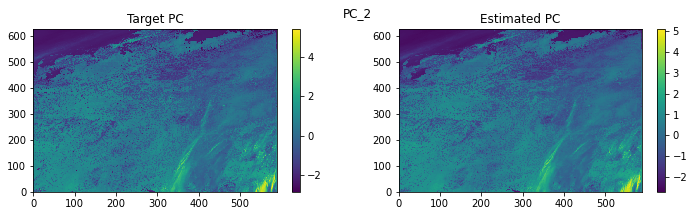

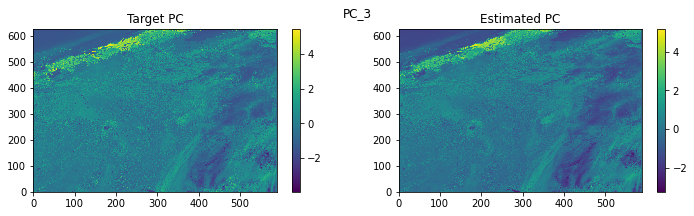

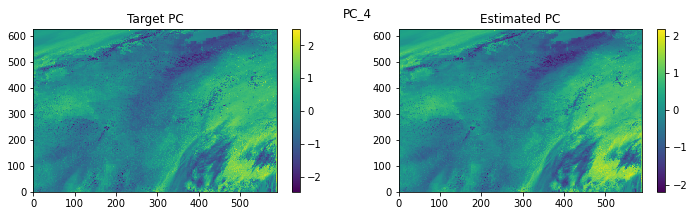

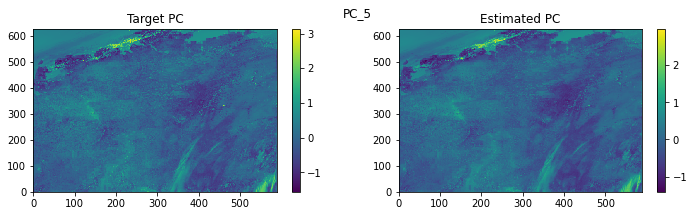

In [183]:

for i in range(len(target_input)):
    fig = plt.figure(figsize=(12, 3))

    fig.suptitle(f'PC_{i}')
    # Test
    axes0 = plt.subplot(121)
    ctr = axes0.pcolormesh(target_input[i])
    # ctr = axes0.pcolormesh(target_input)
    axes0.set_title(f"Target PC")
    plt.colorbar(ctr)

    # Emulator
    axes = plt.subplot(122)
    ctr = axes.pcolormesh(predicted_input[i])
    # ctr = axes.pcolormesh(predicted_input)
    axes.set_title(f"Estimated PC")
    plt.colorbar(ctr)

    plt.show()
    #from eofs.xarray import Eof

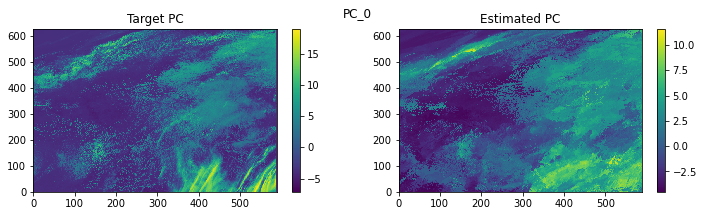

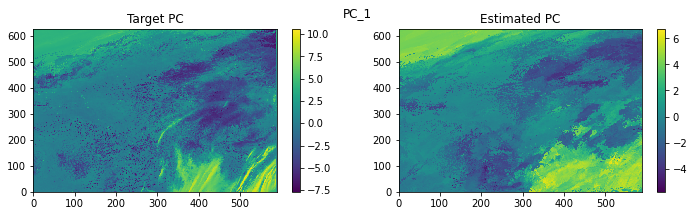

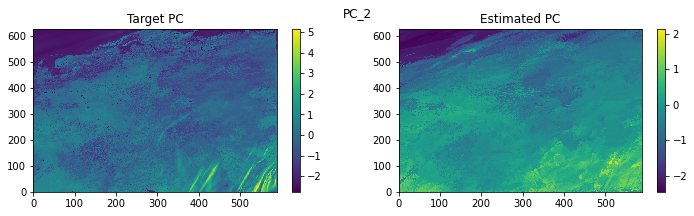

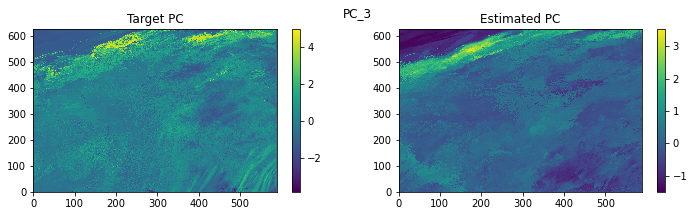

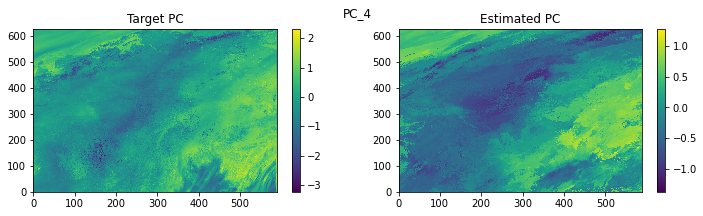

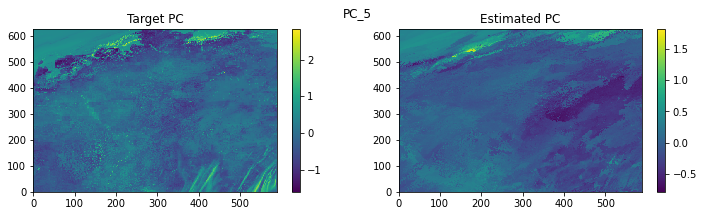

In [184]:

for i in range(len(target_output)):
    fig = plt.figure(figsize=(12, 3))

    fig.suptitle(f'PC_{i}')
    # Test
    axes0 = plt.subplot(121)
    ctr = axes0.pcolormesh(target_output[i])
    # ctr = axes0.pcolormesh(target_output)
    axes0.set_title(f"Target PC")
    plt.colorbar(ctr)

    # Emulator
    axes = plt.subplot(122)
    ctr = axes.pcolormesh(predicted_output[i])
    # ctr = axes.pcolormesh(predicted_output)
    axes.set_title(f"Estimated PC")
    plt.colorbar(ctr)
    plt.show()
    

In [25]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import argparse
import pandas as pd
from eofs.xarray import Eof
from sklearn import preprocessing
from sklearn.decomposition import PCA

from lwp_nd import lwp_nd_input_ICON
from PCA_radiances import PCA_calculation, variance_sklearn_plot, dataframe_csv, convert_3D

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, check_scoring, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


def get_rmse_array(truth, pred):
    print(truth.shape, pred.shape)
    weights = np.cos(np.deg2rad(truth.lat))

    return np.sqrt(((truth - pred.reshape(-1, 96,144))**2).weighted(weights).mean(['lat', 'lon'])).data.mean()


def get_training_inputs(path_output, path_ICON):
    
    p_2013, T_2013, q_2013, max_cdnc_2013_cm, lwp_2013, lat, lon, height= lwp_nd_input_ICON(path_output = path_output, path_ICON = path_ICON) #obtain more outputs of it

    # call pca, new to run it again and kmwasn but also adapt inputs array of inputs, array of outpus, usig of reference code of clibenc
    # train_files = [ "T09", "T12" ]
    # train_inputs_variables_1d = [ 'height','lat', 'lon']
    # train_inputs_variables_2d = [ "t2m", 'q2m', 'p_surf', 'u_surf', 'v_surf', 't_skin', 'h_surf', 'lat', 'lon', 'qnc', 'lwp']
    # train_inputs_variables_3d = [ "p", "t", "q", 'tca', 'lwc', 'iwc']
    
    train_inputs_variables_2D = ['qnc_max', 'lwp'] #(lat, lon)
    train_inputs_variables_3D = { "pres": p_2013, "ta": T_2013, "hus":q_2013} #(height, lat, lon)
    n_pca_variables_3D = { "pres": 5, "ta": 10, "hus":24} #(height, lat, lon)

    print('==== variables 2D', np.shape(max_cdnc_2013_cm))
    print('--after flat', np.shape(max_cdnc_2013_cm.flatten()))


    print("==========Nan values=====================\n")


    
    df = pd.DataFrame({  #falta normalizar
        "qnc_max" : max_cdnc_2013_cm.flatten(),
        "lwp": lwp_2013.flatten()
    }) #0,1,2,3,....row,row,row,

    count_nan_in_df = pd.DataFrame(df).isnull().sum()
    print (count_nan_in_df)  #can i used 0 in the lwp and nd?
    df = df.fillna(0)

        
        
    scaler_2D = preprocessing.StandardScaler()# Fit on training set only.
    scaler_2D.fit(df)

    training_input_variables_df = pd.DataFrame(scaler_2D.transform(df), columns = ["qnc_max", "lwp"]) 

    # Combine with aerosol EOFs
    scaler_3D = []
    pca_3D = []

    for key, var in train_inputs_variables_3D.items():  
        var = var.transpose(1,2,0)
        var_df = pd.DataFrame(var.reshape(-1, var.shape[2]))
        var_df.columns = [f"{key}_{i}" for i in range(var.shape[2])]
        # scaler = preprocessing.StandardScaler().fit(var_df) 
        scaler = preprocessing.StandardScaler()# Fit on training set only.        
        scaler_3D.append(scaler)

        scaler.fit(var_df)
        var_scaled = scaler.transform(var_df)
        
        
        n_pca = n_pca_variables_3D[key] #150
        name_plot= "{}_PCA_variance_{}_variable".format(n_pca, key)
        PC, X_pca, pca = PCA_calculation(var_scaled, name_plot,n_pca, path_output)
        pca_3D.append(pca)
        print( 'Original shape: {}'.format(str(PC.shape)))
        print( 'Original shape: {}'.format(str(X_pca.shape)))
        print( 'Reduced shape: {}'.format(str(X_pca.shape)))
        principalDf = pd.DataFrame(data = X_pca
             , columns = [f"{key}_PCA_{i}" for i in range(n_pca)])
        training_input_variables_df=pd.concat([training_input_variables_df, principalDf], axis=1)



        # training_input_variables_df=pd.concat([training_input_variables_df, var_df], axis=1)



    # for key, var in train_inputs_variables_3D.items():  
    #     var = var.transpose(1,2,0)
    #     var_df = pd.DataFrame(var.reshape(-1, var.shape[2]))
    #     var_df.columns = [f"{key}_{i}" for i in range(var.shape[2])]
    #     training_input_variables_df=pd.concat([training_input_variables_df, var_df], axis=1)



    training_input_variables_df.describe().to_csv(path_output + "/inputs_description.csv")    
    print("ok dataframe")

    # count_nan 
    count_nan_in_df = training_input_variables_df.isnull().sum()
    print (count_nan_in_df)  #can i used 0 in the lwp and nd?
    
    #X_train_np = np.array([X_train_reshaped['pres'].data, X_train_reshaped['ta'].data, X_train_reshaped['hus'].data, X_train_reshaped['qnc'].data])

    # pd.set_option('display.float_format', lambda x: '%.1f' % x)
    # df.columns= colum
    

    return training_input_variables_df, scaler_2D, scaler_3D, pca_3D, n_pca_variables_3D


def from2to3d(x):
    x_3d = np.zeros((6, 628,589)) 

    for i in range(6):
        x_3d[i,:,:] = x[:,i].reshape(-1,589)
        
    return x_3d
  

def test_random_forest(train_x, train_y, test_x, test_y):
    rf_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 
# rf_model = RandomForestRegressor( random_state=0, bootstrap=False, max_features='auto', **{'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 4,  'max_depth': 1})
    
    rf_pcs = rf_model.fit(train_x, train_y)
    

        
    return rf_pcs


def read_data_refl_emiss_rttov_old(rttov_path_rad, rttov_path_refl_emmis):
    '''
    
    output: refl_emmiss (HxWxCH)
    '''
    rttov_ds_rad = xr.open_dataset(rttov_path_rad).compute()  # write read rttov in a function
    rttov_ds_refl_emmi = xr.open_dataset(rttov_path_refl_emmis).compute()
    rttov_variable = np.zeros((np.shape(rttov_ds_rad['Y'].values)))
    
    
    print("****************variables shape ", np.shape(rttov_ds_refl_emmi['bt_refl_total'].values), np.shape(rttov_variable), np.shape(rttov_ds_rad['Y'].values))

    rttov_variable[:19] = rttov_ds_refl_emmi['bt_refl_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
    rttov_variable[19:25] = rttov_ds_rad['Y'][19:25]
    rttov_variable[25] = rttov_ds_refl_emmi['bt_refl_total'][19] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
    rttov_variable[26:36] = rttov_ds_rad['Y'][26:36]

    rttov_bands =rttov_ds_rad['chan'].values
    print('rttov_variable',np.shape(rttov_variable))
    refl_emmiss =  rttov_variable[:,9:,].transpose(1,2,0)
    
    return  refl_emmiss, rttov_bands

### the next should be the last version 
def read_data_refl_emiss_rttov(path_rttov_test):
    '''
    
    output: refl_emmiss (HxWxCH)
    '''
    rttov_ds_refl_emmi = xr.open_dataset(path_rttov_test).compute()
    rttov_variable = np.zeros((np.shape(rttov_ds_refl_emmi['radiances_total'].values)))
    
    
    print("****************variables shape ", np.shape(rttov_ds_refl_emmi['bt_refl_total'].values), np.shape(rttov_variable), np.shape(rttov_ds_refl_emmi['radiances_total'].values))

    rttov_variable[:19] = rttov_ds_refl_emmi['bt_refl_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
    rttov_variable[19:25] = rttov_ds_refl_emmi['radiances_total'][19:25]
    rttov_variable[25] = rttov_ds_refl_emmi['bt_refl_total'][25] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
    rttov_variable[26:36] = rttov_ds_refl_emmi['radiances_total'][26:36]

    rttov_bands =rttov_ds_refl_emmi['chan'].values
    print('rttov_variable',np.shape(rttov_variable))
    refl_emmiss =  rttov_variable[:,9:,].transpose(1,2,0)
    
    return  refl_emmiss, rttov_bands
    
    

def read_input_target(rttov_path_rad, rttov_path_refl_emmis, path_output):
    '''
    PC_output (latxlon, number_pcs)
    '''

    refl_emmiss, rttov_bands = read_data_refl_emiss_rttov_old(rttov_path_rad, rttov_path_refl_emmis)

    ###### flat ###########################
    name_file = 'refl_emiss'
    df = dataframe_csv(variable = refl_emmiss, colum = rttov_bands, path_output = path_output, name_file = name_file)
    ###### standard scaler ###########################\
    scaler = preprocessing.StandardScaler().fit(df)  #Standardize features by removing the mean and scaling to unit variance
    X_scaled = scaler.transform(df)
    ###### analysis  PCA###########################
    name_plot= "PCA_variance_refl_emiss"
    n_pca = 6 #2 #test JQ 
    n_bands = len(rttov_bands) #2 #test JQ     
    PC_output_all, X_reduced_output, pca = PCA_calculation(X_scaled,name_plot,n_pca, path_output)

    principalDf = pd.DataFrame(data = X_reduced_output
             , columns = [f"PCA_{i}" for i in range(np.shape(X_reduced_output)[1])])
        
        
    return scaler, principalDf, pca
    
def get_test_input(path_output, path_ICON_test, scaler_2D, scaler_3D, pca_3D, n_pca_variables_3D):
    '''
    PC_output (latxlon, number_pcs)
    '''
    p_2013, T_2013, q_2013, max_cdnc_2013_cm, lwp_2013, lat, lon, height= lwp_nd_input_ICON(path_output = path_output, path_ICON = path_ICON_test) #obtain more outputs of it

    train_inputs_variables_3D = { "pres": p_2013, "ta": T_2013, "hus":q_2013} #(height, lat, lon)

#     whereAreNaNs = np.isnan(max_cdnc_2013_cm)
#     max_cdnc_2013_cm[whereAreNaNs] = 0
#     whereAreNaNs = np.isnan(lwp_2013)
#     lwp_2013[whereAreNaNs] = 0
    

    df = pd.DataFrame({  #falta normalizar
        "qnc_max" : max_cdnc_2013_cm.flatten(),
        "lwp": lwp_2013.flatten()
    }) #0,1,2,3,....row,row,row,

    df = df.fillna(0)

        
    test_df= scaler_2D.transform(df)        

    testing_input_variables_df = pd.DataFrame(test_df, columns = ["qnc_max", "lwp"]) 

    # Combine with aerosol EOFs
    i = 0
    for key, var in train_inputs_variables_3D.items():  
        var = var.transpose(1,2,0)
        var_df = pd.DataFrame(var.reshape(-1, var.shape[2]))
        var_df.columns = [f"{key}_{i}" for i in range(var.shape[2])]
        
        test_df= scaler_3D[i].transform(var_df)        
        principalDf = pd.DataFrame(data = pca_3D[i].transform(test_df)
             , columns = [f"{key}_PCA_{i}" for i in range(n_pca_variables_3D[key])])
        testing_input_variables_df=pd.concat([testing_input_variables_df, principalDf], axis=1)
 


        i+=1
        
    return testing_input_variables_df

def get_test_output(path_rttov_test, path_output, scaler, pca):
    
    y_test, rttov_bands = read_data_refl_emiss_rttov(path_rttov_test)
    ###### flat ###########################
    name_file = 'refl_emiss_test'
    df = dataframe_csv(variable = y_test, colum = rttov_bands, path_output = path_output, name_file = name_file)
    
    
    test_df= scaler.transform(df)
    test_df = pca.transform(test_df)
    
    return test_df
    
def plot_target_prediction(target, prediction, path_output, name_plot):
    n_img = len(target)
    fig = plt.figure(figsize=(5 * n_img, 5 * 2 ))  #WxH
    
    fig.suptitle("Comparation between target and prediction")

    for i in range(n_img):

        # Emulator
        axes = plt.subplot(2,n_img, i + 1)
        ctr = axes.pcolormesh(prediction[i])
        # ctr = axes.pcolormesh(predicted_input)
        axes.set_title(f"Prediction PC_{i}")
        plt.colorbar(ctr)
        
        # Target
        axes0 = plt.subplot(2,n_img, i + 1 + n_img)
        ctr = axes0.pcolormesh(target[i])
        # ctr = axes0.pcolormesh(target)
        axes0.set_title(f"Target PC_{i}")
        plt.colorbar(ctr)
    plt.tight_layout()
        
        
    figure_name = '{}/{}.png'.format(path_output, name_plot) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    plt.close()   
    


In [21]:
path_ICON = "/home/jvillarreal/Documents/phd/dataset/data_rttov_T12.nc"
path_output = "/home/jvillarreal/Documents/phd/output/ML_output"
path_OUTPUT_RTTOV = "/home/jvillarreal/Documents/phd/github/output-rttov/output-test-2-modis.nc"
rttov_path_refl_emmis = "/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-data-icon-1to19-26-T12.nc"
rttov_path_rad = "/home/jvillarreal/Documents/phd/github/output-rttov/rttov-13-data-icon-1-to-36-not-flip.nc"
path_rttov_test = "/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-data-icon-1to36-T09.nc"
path_ICON_test = "/home/jvillarreal/Documents/phd/dataset/data_rttov_T09.nc"



In [7]:
# train_outputs = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']

train_x_df, scaler_2D, scaler_3D, pca_3D, n_pca_variables_3D = get_training_inputs(path_output,path_ICON)
scaler_Y, train_y_df, PCA_Y = read_input_target(rttov_path_rad, rttov_path_refl_emmis, path_output)


test_x_df = get_test_input(path_output, path_ICON_test, scaler_2D, scaler_3D, pca_3D, n_pca_variables_3D)
test_y = get_test_output(path_rttov_test, path_output, scaler_Y, PCA_Y)


count_nan_in_df = train_x_df.isnull().sum()
print ("--------training_input_variables_df-------",count_nan_in_df)  




rf_pcs = test_random_forest(train_x = train_x_df,
                                          train_y = train_y_df, 
                                          test_x = test_x_df, 
                                          test_y = test_y)



<xarray.Dataset>
Dimensions:       (lat: 637, lon: 589, height: 150)
Coordinates:
  * height        (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
  * lat           (lat) float64 47.5 47.51 47.52 47.53 ... 54.47 54.48 54.5
  * lon           (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables: (12/21)
    FR_LAND       (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    cct           (lat, lon) float32 0.0 0.0 0.0 0.0 ... -999.0 7.681e+04 0.0
    clc           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cli           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clw           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clwvi         (lat, lon) float32 0.0 8.124e-06 8.124e-06 ... 0.01018 0.04625
    ...            ...
    tas           (lat, lon) float32 289.8 289.9 289.9 ... 279.3 279.4 279.3
    topography_c  (lat, lon) float32 411.2 411.7 411.7 393.6 ... 0.0 0.0 0.

/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:71: RuntimeWarning: overflow encountered in exp
  esat_2013 = (0.611* np.exp(17.3*T_c))/(T_c+237.3)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:73: RuntimeWarning: overflow encountered in multiply
  esat_2013 = esat_2013*1000.0
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:76: RuntimeWarning: divide by zero encountered in true_divide
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:76: RuntimeWarning: overflow encountered in true_divide
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:76: RuntimeWarning: overflow encountered in multiply
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:77: RuntimeWarning: invalid value encountered in multiply
  pv_2013 = (esat_2013*RH_2013)/100.0
/home/jvillarreal/Documents/ph

max and min cdnc nan nan
1 (150, 628, 589) (628, 589) (628, 589)
2 (55483800,) (369892,) (369892,)
nan debe ser igual to 0.6855309375
------------
 [      nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan


/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(x, y, z, cmap ='jet', vmin=vmin, vmax = vmax ) #cmap=cmap.N, norm=norm)


===============T_2013 (height 120, lat 57, lon 227) cm: 276.151153564453 ==  276.40933
===============T_c (height 120, lat 57, lon 227) cm: 3.00115356445315==  3.2593384
===============esat_2013 (height 120, lat 57, lon 227) 758.360598313415 ==  7.819643e+24
===============p_2013 (height 120, lat 57, lon 227)75935.328125 ==  76403.13
===============qs_2013 (height 120, lat 57, lon 227) 0.00621186875461262  ==  6.3659924e+19
===============r_2013 (height 120, lat 57, lon 227) 0.0062973626597643 ==  0.004533605
===============RH_2013 (height 120, lat 57, lon 227) 101.376299283339 ==  7.1216e-21
===============pv_2013 (height 120, lat 57, lon 227) 768.797909793127 ==  556.8837
===============pd_2013 (height 120, lat 57, lon 227) 75166.5302152069 ==  75846.25
===============rho_2013 (height 120, lat 57, lon 227) 0.954250058491486 ==  0.960264
===============cdnc_2013_cm (height 120, lat 57, lon 227) 15.5508091629487 ==  0.0
==== variables 2D (628, 589)
--after flat (369892,)
==========Nan 

ic| cum_var_exp: array([0.705, 0.986, 0.998, 0.998, 0.999, 0.999, 0.999, 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   

 sum of explained variance ratios of the PCs : (5, 0.9989265982854475)
explained variance: [0.705 0.986 0.998 0.999 0.999]
/home/jvillarreal/Documents/phd/output/ML_output/5_PCA_variance_pres_variable.png
Original shape: (369892, 150)
Original shape: (369892, 5)
Reduced shape: (369892, 5)
Eigenvalues:

 [9.740e+01 2.675e+01 5.269e+00 4.543e+00 2.481e+00 1.732e+00 1.451e+00
 1.222e+00 8.986e-01 7.256e-01 6.405e-01 5.897e-01 5.113e-01 4.826e-01
 4.118e-01 3.926e-01 3.830e-01 3.221e-01 3.086e-01 2.836e-01 2.306e-01
 2.091e-01 1.931e-01 1.739e-01 1.596e-01 1.496e-01 1.246e-01 1.051e-01
 1.023e-01 9.726e-02 8.991e-02 8.516e-02 7.614e-02 6.664e-02 6.509e-02
 6.352e-02 5.901e-02 5.219e-02 4.974e-02 4.759e-02 4.578e-02 4.016e-02
 3.826e-02 3.545e-02 3.396e-02 3.376e-02 3.317e-02 3.161e-02 3.078e-02
 2.973e-02 2.750e-02 2.681e-02 2.440e-02 2.371e-02 2.258e-02 2.198e-02
 2.076e-02 1.969e-02 1.882e-02 1.746e-02 1.725e-02 1.641e-02 1.549e-02
 1.431e-02 1.455e-02 1.314e-02 1.295e-02 1.193e-02 1.155

ic| cum_var_exp: array([0.649, 0.828, 0.863, 0.893, 0.91 , 0.921, 0.931, 0.939, 0.945,
                        0.95 , 0.954, 0.958, 0.961, 0.965, 0.967, 0.97 , 0.973, 0.975,
                        0.977, 0.979, 0.98 , 0.982, 0.983, 0.984, 0.985, 0.986, 0.987,
                        0.988, 0.988, 0.989, 0.99 , 0.99 , 0.991, 0.991, 0.991, 0.992,
                        0.992, 0.993, 0.993, 0.993, 0.994, 0.994, 0.994, 0.994, 0.995,
                        0.995, 0.995, 0.995, 0.995, 0.996, 0.996, 0.996, 0.996, 0.996,
                        0.996, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997,
                        0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998,
                        0.998, 0.998, 0.998, 0.998, 0.998, 0.999, 0.999, 0.999, 0.999,
                        0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
                        0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
                        0.999, 0.999, 0.999

 sum of explained variance ratios of the PCs : (10, 0.9498523937938232)
explained variance: [0.649 0.828 0.863 0.893 0.91  0.921 0.931 0.939 0.945 0.95 ]
/home/jvillarreal/Documents/phd/output/ML_output/10_PCA_variance_ta_variable.png
Original shape: (369892, 150)
Original shape: (369892, 10)
Reduced shape: (369892, 10)
Eigenvalues:

 [6.493e+01 1.705e+01 1.271e+01 7.567e+00 5.642e+00 4.508e+00 4.247e+00
 3.439e+00 3.336e+00 2.359e+00 2.268e+00 1.841e+00 1.633e+00 1.442e+00
 1.369e+00 1.222e+00 1.158e+00 1.091e+00 9.995e-01 9.098e-01 7.286e-01
 6.688e-01 6.451e-01 6.114e-01 5.298e-01 4.866e-01 4.661e-01 4.353e-01
 4.055e-01 3.658e-01 3.413e-01 3.240e-01 2.834e-01 2.632e-01 2.128e-01
 2.092e-01 1.952e-01 1.872e-01 1.685e-01 1.634e-01 1.486e-01 1.325e-01
 1.236e-01 1.134e-01 1.096e-01 1.057e-01 9.471e-02 9.342e-02 8.231e-02
 7.993e-02 7.209e-02 7.300e-02 6.722e-02 6.076e-02 5.722e-02 5.479e-02
 5.125e-02 4.806e-02 4.538e-02 4.075e-02 4.178e-02 4.261e-02 3.809e-02
 3.586e-02 3.473e-02 3.3

ic| cum_var_exp: array([0.433, 0.547, 0.631, 0.682, 0.719, 0.749, 0.778, 0.801, 0.823,
                        0.839, 0.854, 0.866, 0.877, 0.887, 0.896, 0.904, 0.911, 0.919,
                        0.925, 0.931, 0.936, 0.941, 0.945, 0.949, 0.953, 0.956, 0.959,
                        0.962, 0.965, 0.967, 0.969, 0.972, 0.973, 0.975, 0.977, 0.978,
                        0.979, 0.981, 0.982, 0.983, 0.984, 0.985, 0.985, 0.986, 0.987,
                        0.988, 0.988, 0.989, 0.989, 0.99 , 0.99 , 0.991, 0.991, 0.992,
                        0.992, 0.993, 0.993, 0.993, 0.994, 0.994, 0.994, 0.994, 0.995,
                        0.995, 0.995, 0.995, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
                        0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.998,
                        0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998,
                        0.998, 0.998, 0.998, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
                        0.999, 0.999, 0.999

 sum of explained variance ratios of the PCs : (24, 0.9492648385292826)
explained variance: [0.433 0.547 0.631 0.682 0.719 0.749 0.778 0.801 0.823 0.839 0.854 0.866
 0.877 0.887 0.896 0.904 0.912 0.919 0.926 0.932 0.936 0.941 0.945 0.949]
/home/jvillarreal/Documents/phd/output/ML_output/24_PCA_variance_hus_variable.png
Original shape: (369892, 150)
Original shape: (369892, 24)
Reduced shape: (369892, 24)
ok dataframe
qnc_max       0
lwp           0
pres_PCA_0    0
pres_PCA_1    0
pres_PCA_2    0
pres_PCA_3    0
pres_PCA_4    0
ta_PCA_0      0
ta_PCA_1      0
ta_PCA_2      0
ta_PCA_3      0
ta_PCA_4      0
ta_PCA_5      0
ta_PCA_6      0
ta_PCA_7      0
ta_PCA_8      0
ta_PCA_9      0
hus_PCA_0     0
hus_PCA_1     0
hus_PCA_2     0
hus_PCA_3     0
hus_PCA_4     0
hus_PCA_5     0
hus_PCA_6     0
hus_PCA_7     0
hus_PCA_8     0
hus_PCA_9     0
hus_PCA_10    0
hus_PCA_11    0
hus_PCA_12    0
hus_PCA_13    0
hus_PCA_14    0
hus_PCA_15    0
hus_PCA_16    0
hus_PCA_17    0
hus_PCA_18    0
hus

ic| cum_var_exp: array([0.673, 0.922, 0.952, 0.975, 0.987, 0.992, 0.995, 0.997, 0.998,
                        0.999, 0.999, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ])


 sum of explained variance ratios of the PCs : (6, 0.9918035949709683)
explained variance: [0.673 0.922 0.952 0.975 0.987 0.992]
/home/jvillarreal/Documents/phd/output/ML_output/PCA_variance_refl_emiss.png
<xarray.Dataset>
Dimensions:       (lat: 637, lon: 589, height: 150)
Coordinates:
  * height        (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
  * lat           (lat) float64 47.5 47.51 47.52 47.53 ... 54.47 54.48 54.5
  * lon           (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables: (12/21)
    FR_LAND       (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    cct           (lat, lon) float32 0.0 0.0 0.0 0.0 ... 7.503e+04 7.502e+04 0.0
    clc           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cli           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clw           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clwvi         (lat, lon) float32 0.0 0.0 0.

/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:71: RuntimeWarning: overflow encountered in exp
  esat_2013 = (0.611* np.exp(17.3*T_c))/(T_c+237.3)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:73: RuntimeWarning: overflow encountered in multiply
  esat_2013 = esat_2013*1000.0
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:76: RuntimeWarning: divide by zero encountered in true_divide
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:76: RuntimeWarning: overflow encountered in true_divide
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:76: RuntimeWarning: overflow encountered in multiply
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:77: RuntimeWarning: invalid value encountered in multiply
  pv_2013 = (esat_2013*RH_2013)/100.0
/home/jvillarreal/Documents/ph

max and min cdnc nan nan
1 (150, 628, 589) (628, 589) (628, 589)
2 (55483800,) (369892,) (369892,)
nan debe ser igual to --
------------
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]


/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(x, y, z, cmap ='jet', vmin=vmin, vmax = vmax ) #cmap=cmap.N, norm=norm)


===============T_2013 (height 120, lat 57, lon 227) cm: 276.151153564453 ==  276.37033
===============T_c (height 120, lat 57, lon 227) cm: 3.00115356445315==  3.220337
===============esat_2013 (height 120, lat 57, lon 227) 758.360598313415 ==  3.983164e+24
===============p_2013 (height 120, lat 57, lon 227)75935.328125 ==  76395.13
===============qs_2013 (height 120, lat 57, lon 227) 0.00621186875461262  ==  3.243044e+19
===============r_2013 (height 120, lat 57, lon 227) 0.0062973626597643 ==  0.0049734227
===============RH_2013 (height 120, lat 57, lon 227) 101.376299283339 ==  1.5335662e-20
===============pv_2013 (height 120, lat 57, lon 227) 768.797909793127 ==  610.84454
===============pd_2013 (height 120, lat 57, lon 227) 75166.5302152069 ==  75784.29
===============rho_2013 (height 120, lat 57, lon 227) 0.954250058491486 ==  0.9600416
===============cdnc_2013_cm (height 120, lat 57, lon 227) 15.5508091629487 ==  0.0
****************variables shape  (36, 637, 589) (36, 637, 589)

NameError: name 'train_x' is not defined

In [15]:
#####
score = rf_pcs.score(train_x_df, train_y_df)
print('score in training:', score)  
    
pred_pcs_train = rf_pcs.predict(train_x_df)
predicted_3D_train = from2to3d(pred_pcs_train)

#####
score = rf_pcs.score(test_x_df, test_y)
print('score in testing:', score)

test_pred_pcs = rf_pcs.predict(test_x_df)
predicted_3D = from2to3d(test_pred_pcs)


score in training: 0.980073730517014
score in testing: 0.3524330497717402


In [24]:

train_y_3D = from2to3d(train_y_df.to_numpy())
plot_target_prediction(target = train_y_3D, prediction = predicted_3D_train, path_output = path_output, name_plot = 'target_pred_training')


target_3D = from2to3d(test_y)
plot_target_prediction(target_3D, predicted_3D, path_output, name_plot = 'target_pred_testing')


In [26]:
def permutation_test(X_test, pr_truth, rf_pr):
    #%%time
    pr_result = permutation_importance(
        # rf_pr.model.model, X_test, pr_truth, n_repeats=10, random_state=42, n_jobs=1, scoring=make_scorer(get_rmse_array))
        rf_pr.model.model, X_test, pr_truth, n_repeats=10, random_state=42, n_jobs=1)

    importances = rf_pr.model.model.feature_importances_
    feature_names = list(X_test.columns)
    
    std = np.std([tree.feature_importances_ for tree in rf_pr.model.model.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("PC0")
    ax.set_ylabel("Feature importances")
    fig.tight_layout()
            
    figure_name = '{}/Feature importances.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    plt.close()   
    

In [33]:
import time

def permutation_test(x, y, model):

    start_time = time.time()
    result = permutation_importance(model, x, y, n_repeats=10, random_state=0)
    elapsed_time = time.time() - start_time
    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

    forest_importances = pd.Series(result.importances_mean, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

In [ ]:
permutation_test(x = train_x_df, y = train_y_df, model = rf_pcs)

# permutation_test(X_test = train_x_df, pr_truth = train_y_df.to_numpy(), rf_pr = rf_pcs)
# permutation_test(X_test = test_x_df, pr_truth = test_y[:,0], rf_pr = rf_pcs[:,0])